In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


In [2]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.backend.flatten(y_true)
    y_pred_f = keras.backend.flatten(y_pred)
    intersection = keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (keras.backend.sum(y_true_f + y_pred_f))

In [3]:
model = load_model('last_model.h5', custom_objects={'dice_coef': dice_coef})

In [4]:
highway_input= 'C:\\dataset2014\\results2\\baseline\\highway'
highway_masks= 'C:\\dataset\\masks\\baseline\\highway\\Segmented\\highway.mp4'

In [58]:
masks= []

In [59]:
cap = cv2.VideoCapture(highway_masks)  

In [60]:
while True:
    ret, frame = cap.read()

    if not ret:
        break
    frame= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame= cv2.resize(frame, (256,256), interpolation = cv2.INTER_NEAREST)
    frame= np.expand_dims(frame, axis=-1)
    masks.append(frame)

In [61]:
print(len(masks))
print(masks[0].shape)

1700
(256, 256, 1)


In [62]:
def generate_masked(frame, mask):
    
    _, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)

    result = cv2.bitwise_and(frame, frame, mask=mask_inv)
    return result

In [63]:
frames=[]

In [64]:
cnt=0
for img in os.listdir(highway_input):
    img_path= os.path.join(highway_input, img)
   
    img = cv2.imread(img_path)
    img = cv2.resize(img, (256,256), interpolation = cv2.INTER_NEAREST)
    
    gt= masks[cnt]
    
    img= generate_masked(img, gt)
    cnt+=1
    
    frames.append(img)

In [67]:
inpainted_frames = []

In [68]:
for img in frames:
    img= np.array(img, dtype= 'float')
    img /= 255.0
    
    img= [img]
    img= np.array(img, dtype= 'float')

    pred = model.predict(img)
    
    inpainted_frames.append(pred[0])
    
    


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 227ms/step


1/1 [==============================] - 0s 232ms/step


1/1 [==============================] - 0s 231ms/step


1/1 [==============================] - 0s 243ms/step


1/1 [==============================] - 0s 245ms/step


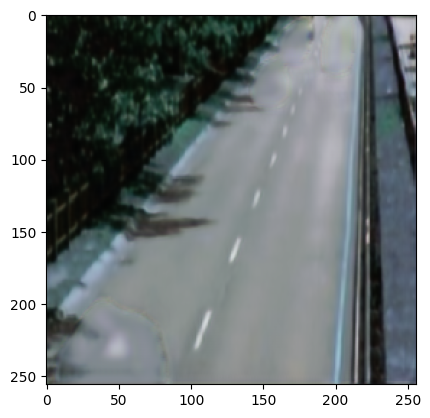

In [75]:
plt.imshow(inpainted_frames[700])

In [79]:
output_file = 'highway_inpainted_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
frame_rate = 30  
width, height = inpainted_frames[0].shape[1], inpainted_frames[0].shape[0]  
out = cv2.VideoWriter(output_file, fourcc, frame_rate, (width, height))

for frame in inpainted_frames:
    frame*= 255.0
    frame= frame.astype("uint8")
    frame = np.array(frame)
    out.write(frame)

out.release()

cv2.destroyAllWindows()